Results for Jaccard with Manhattan similarity:
Ranking: [10 12  9 13 16 15  3 26 14 19 25 11  6  8  7 17  4  5  2 24 23 22 18  1
  0 27 21 20 28]
Closeness scores: [0.16317959 0.17735697 0.20609367 0.47948793 0.2631501  0.22056865
 0.37810045 0.34590825 0.37516153 0.71924315 0.86512915 0.38081369
 0.73393806 0.60819638 0.44195665 0.48386095 0.51682458 0.26606407
 0.17967936 0.43966852 0.12261122 0.13130372 0.18104329 0.19056955
 0.19263369 0.42776257 0.46329537 0.14571563 0.10691621]
--------------------------------------------------
Results for Jaccard with Canberra similarity:
Ranking: [10 12  9 13 16  3 15 26 25 14  8 19  6  7 11  4 17  5 23 27  2 22 24 21
 18  1 20  0 28]
Closeness scores: [0.07600255 0.0845379  0.10888954 0.44651031 0.17597444 0.14179884
 0.31728433 0.31282382 0.34288301 0.7742842  0.93042397 0.30295252
 0.78742511 0.61029822 0.35186981 0.42865667 0.48560068 0.16362127
 0.08737544 0.32995893 0.08062241 0.08856233 0.10419821 0.12335659
 0.09699144 0.36789854 0.3971

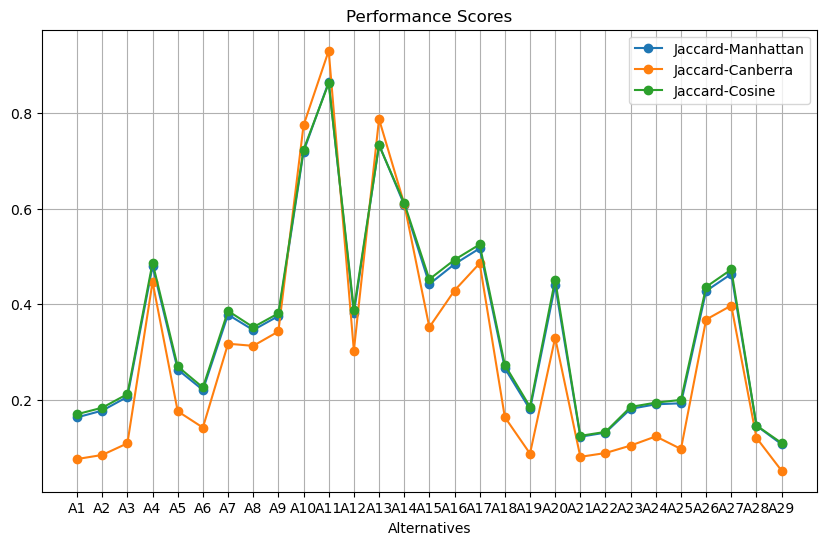

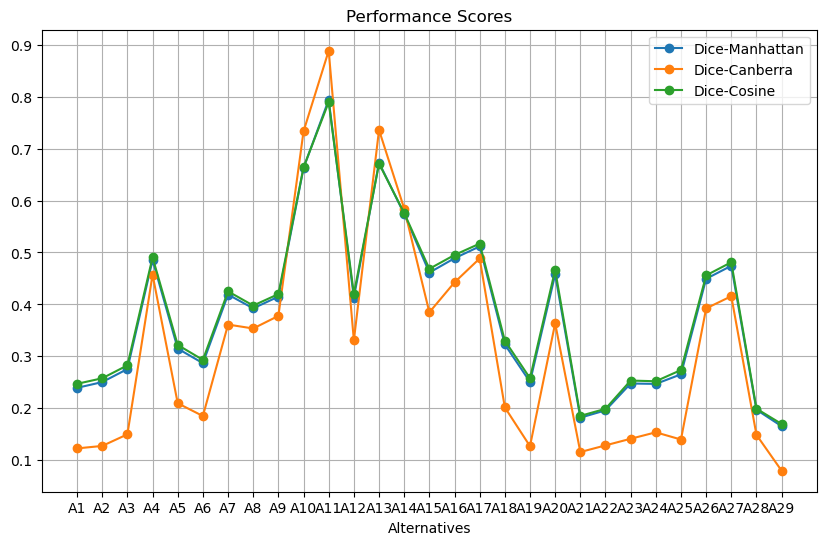

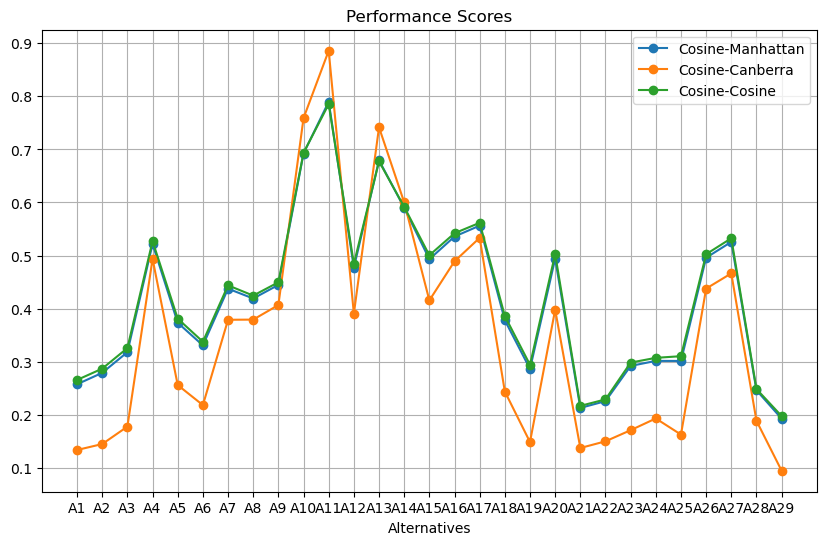

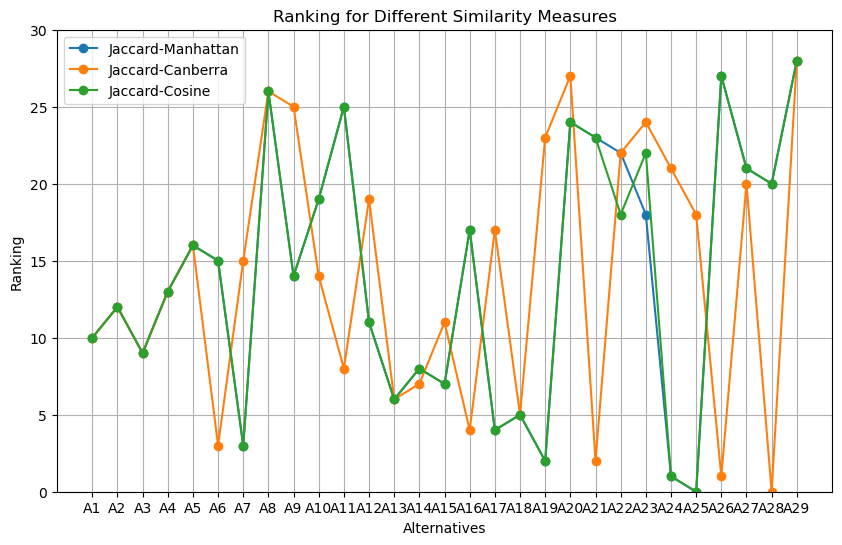

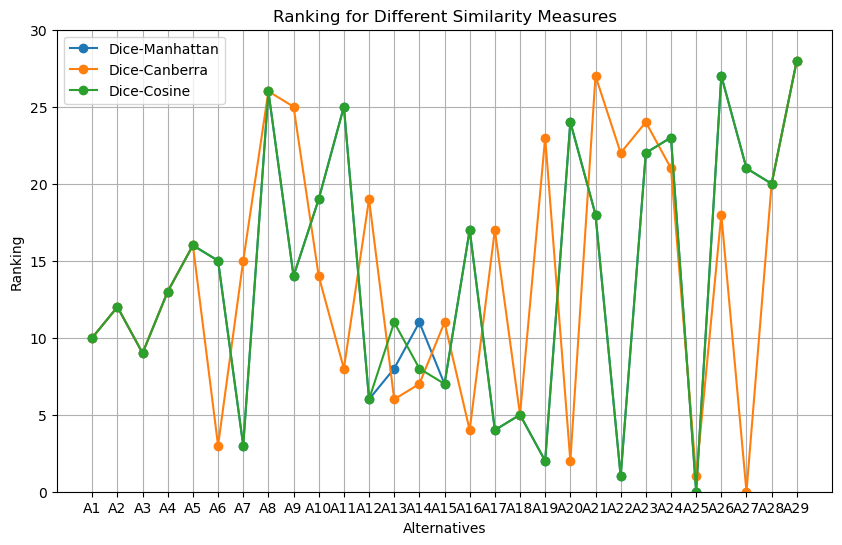

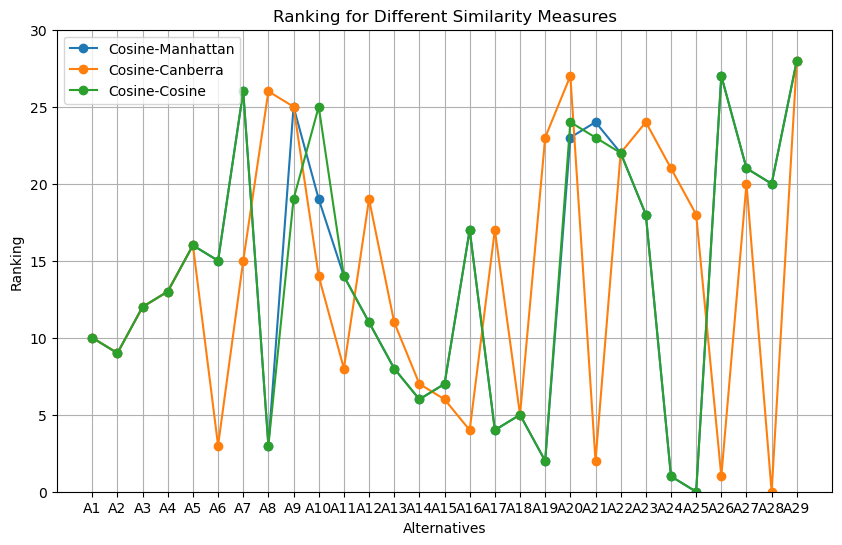

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define probabilistic similarity measure functions
def manhattan_similarity(p_i, p_j):
    return 1 - abs(p_i - p_j)

def canberra_similarity(p_i, p_j):
    return 1 - abs(p_i - p_j) / (abs(p_i) + abs(p_j) + 1e-9)

def cosine_similarity(p_i, p_j):
    return p_i * p_j / (np.sqrt(p_i ** 2) * np.sqrt(p_j ** 2) + 1e-9)

# PHFS similarity combinations
def jaccard_similarity(h1, h2, S_func):
    numerator = np.sum([S_func(p1, p2) * h1[k] * h2[k] for k, (p1, p2) in enumerate(zip(h1, h2))])
    denominator = np.sum([h1[k] ** 2 for k in range(len(h1))]) + np.sum([h2[k] ** 2 for k in range(len(h2))]) - numerator
    return numerator / (denominator + 1e-9)

def dice_similarity(h1, h2, S_func):
    numerator = 2 * np.sum([S_func(p1, p2) * h1[k] * h2[k] for k, (p1, p2) in enumerate(zip(h1, h2))])
    denominator = np.sum([h1[k] ** 2 for k in range(len(h1))]) + np.sum([h2[k] ** 2 for k in range(len(h2))])
    return numerator / (denominator + 1e-9)

# def cosine_phfs_similarity(h1, h2, S_func):
def cosine__similarity(h1, h2, S_func):
    numerator = np.sum([S_func(p1, p2) * h1[k] * h2[k] for k, (p1, p2) in enumerate(zip(h1, h2))])
    denominator = np.sqrt(np.sum([h1[k] ** 2 for k in range(len(h1))])) * np.sqrt(np.sum([h2[k] ** 2 for k in range(len(h2))]))
    return numerator / (denominator + 1e-9)

# TOPSIS implementation
def topsis_similarity(matrix, weights, similarity_func, is_benefit_criteria):
    norm_matrix = matrix / np.sqrt((matrix ** 2).sum(axis=0))
    weighted_matrix = norm_matrix * weights

    ideal_solution = np.where(is_benefit_criteria, np.max(weighted_matrix, axis=0), np.min(weighted_matrix, axis=0))
    anti_ideal_solution = np.where(is_benefit_criteria, np.min(weighted_matrix, axis=0), np.max(weighted_matrix, axis=0))
    
    similarity_to_ideal = np.array([similarity_func(row, ideal_solution) for row in weighted_matrix])
    similarity_to_anti_ideal = np.array([similarity_func(row, anti_ideal_solution) for row in weighted_matrix])

    closeness = similarity_to_ideal / (similarity_to_ideal + similarity_to_anti_ideal + 1e-9)
    ranking = np.argsort(-closeness)
    
    return ranking, closeness

# Main code to apply all combinations
if __name__ == "__main__":
    matrix = np.array([
            [87, 6.58, 0.00, 6.39, 1856.88, 25.85, 68.29, 1876.10, 2.00, 1.29, 3.05, 955956.96],
            [87, 3.74, 0.00, 4.65, 1460.98, 24.02, 70.00, 1664.46, 2.00, 1.29, 3.05, 1194946.20],
            [87, 3.27, 6.90, 2.34, 909.26, 26.86, 72.58, 2543.35, 2.00, 3.23, 4.24, 819391.68],
            [87, 0.62, 6.90, 3.96, 1106.25, 25.74, 72.61, 1398.95, 7.00, 12.24, 11.78, 751109.04],
            [87, 1.92, 6.90, 4.91, 368.53, 25.18, 73.77, 1177.83, 3.00, 2.99, 4.78, 409695.84],
            [87, 2.81, 3.45, 5.74, 1183.15, 24.43, 70.71, 850.67, 3.00, 2.99, 4.78, 785250.36],
            [59, 5.30, 10.34, 2.47, 1734.93, 27.39, 62.58, 3183.05, 7.00, 12.24, 11.78, 990098.28],
            [59, 5.85, 6.90, 3.14, 707.32, 27.33, 69.56, 820.72, 7.00, 12.24, 11.78, 512119.80],
            [59, 4.66, 6.90, 2.74, 943.08, 27.02, 64.95, 1820.08, 7.00, 12.24, 11.78, 751109.04],
            [51, 1.34, 6.90, 1.08, 426.14, 33.28, 77.45, 14045.18, 5.00, 6.13, 7.40, 341413.20],
            [51, 0.62, 3.45, 0.98, 358.53, 35.75, 70.17, 14007.81, 14.00, 9.85, 8.63, 307271.88],
            [60, 1.76, 3.45, 2.36, 966.46, 26.29, 73.72, 5175.47, 3.00, 4.60, 2.79, 614543.76],
            [60, 1.87, 10.34, 1.16, 731.49, 33.54, 71.87, 20610.13, 4.00, 5.04, 3.84, 546261.12],
            [75, 3.35, 10.34, 1.05, 580.72, 34.14, 72.02, 16714.12, 4.00, 3.41, 5.04, 546261.12],
            [75, 2.36, 17.24, 1.92, 1309.44, 30.84, 69.43, 9454.41, 4.00, 3.41, 5.04, 1024239.60],
            [75, 2.20, 13.79, 2.22, 401.38, 29.01, 69.05, 9061.13, 4.00, 3.41, 5.04, 512119.80],
            [60, 1.81, 17.24, 2.34, 1517.23, 26.50, 70.21, 9305.85, 4.00, 3.41, 5.04, 648685.08],
            [75, 1.83, 13.79, 3.88, 835.89, 26.90, 69.59, 3531.56, 2.00, 2.27, 4.31, 751109.04],
            [75, 3.09, 6.90, 4.38, 933.95, 24.50, 71.15, 1563.89, 2.00, 2.27, 4.31, 1160804.88],
            [75, 0.52, 17.24, 3.30, 1592.10, 28.25, 71.85, 4329.06, 5.00, 8.02, 9.84, 1092522.24],
            [26, 5.50, 0.00, 10.63, 1553.26, 27.17, 76.58, 246.04, 1.00, 2.13, 3.27, 785250.36],
            [74, 4.20, 0.00, 8.93, 1882.02, 26.44, 73.03, 212.73, 1.00, 2.13, 3.27, 921815.64],
            [74, 2.77, 6.90, 4.55, 904.45, 26.54, 71.28, 954.77, 2.00, 2.27, 4.31, 887674.32],
            [75, 2.89, 0.00, 5.56, 820.25, 24.43, 69.16, 561.44, 2.00, 1.56, 2.43, 375554.52],
            [59, 5.98, 3.45, 2.98, 455.52, 28.05, 72.10, 2076.38, 3.00, 4.60, 2.79, 614543.76],
            [87, 1.91, 10.34, 2.84, 1065.56, 26.24, 71.01, 3260.21, 6.00, 14.64, 3.76, 546261.12],
            [75, 1.98, 17.24, 2.72, 612.36, 28.70, 70.62, 7656.79, 4.00, 3.41, 5.04, 477978.48],
            [26, 3.33, 0.00, 12.79, 1204.25, 27.77, 75.50, 180.56, 1.00, 2.13, 3.27, 580402.44],
            [26, 5.19, 0.00, 10.91, 742.32, 27.26, 76.89, 253.49, 1.00, 2.13, 3.27, 1058380.92]
    ])
    
    # Replace 0.00 with 0.001 in the decision_matrix
    matrix[matrix == 0.00] = 0.001
    
    # Weights for each criterion
    weights = np.array([0.1477, 0.1477, 0.0319, 0.0319, 0.0668, 0.0319, 0.0163, 0.1477, 0.1477, 0.0163, 0.0668, 0.1477])
 
    # Benefit (True) or Cost (False) criteria
    is_benefit_criteria = np.array([False, False, False, False, True, True, True, True, True, True, True, False])
    
    # Define similarity measures
    similarity_measures = [
        (jaccard_similarity, "Jaccard"),
        (dice_similarity, "Dice"),
#         (cosine_phfs_similarity, "Cosine-PHFS")
        (cosine__similarity, "Cosine")

    ]
    
    probabilistic_measures = [
        (manhattan_similarity, "Manhattan"),
        (canberra_similarity, "Canberra"),
        (cosine_similarity, "Cosine")
    ]
    
    results = {}
    for phfs_func, phfs_name in similarity_measures:
        results[phfs_name] = {}
        for prob_func, prob_name in probabilistic_measures:
            # Combining PHFS similarity with probabilistic measure
            similarity_func = lambda x, y: phfs_func(x, y, prob_func)
            ranking, closeness = topsis_similarity(matrix, weights, similarity_func, is_benefit_criteria)
            
            results[phfs_name][prob_name] = {
                "ranking": ranking,
                "closeness": closeness
            }
            print(f"Results for {phfs_name} with {prob_name} similarity:")
            print("Ranking:", ranking)
            print("Closeness scores:", closeness)
            print("-" * 50)

            
    
    # Visualizing the results
    labels = [f'A{i+1}' for i in range(matrix.shape[0])]
    x = np.arange(len(labels))  # Start x-axis labeling from the first position

    
    # Plotting (optional)
    for phfs_name in results:
        plt.figure(figsize=(10, 6))
        for prob_name in results[phfs_name]:
            closeness = results[phfs_name][prob_name]["closeness"]
            plt.plot(closeness, marker='o', label=f"{phfs_name}-{prob_name}")

        # plt.title(f"Closeness Scores for {phfs_name} Similarity with Different Probabilistic Measures")
        plt.title(f"Performance Scores for Different Similarity Measures")
        plt.xlabel("Alternatives")
        # plt.ylabel("Closeness Score")
        plt.xticks(x, labels)  # Set x-tick labels
        plt.title(f"Performance Scores")
        plt.legend()
        plt.grid()
        plt.show()

        
        
        
    # Plotting ranking (optional)
    for phfs_name in results:
        plt.figure(figsize=(10, 6))
        for prob_name in results[phfs_name]:
            ranking = results[phfs_name][prob_name]["ranking"]
            plt.plot(ranking, marker='o', label=f"{phfs_name}-{prob_name}")

        # plt.title(f"Ranking for {phfs_name} Similarity with Different Probabilistic Measures")
        plt.title(f"Ranking for Different Similarity Measures")
        plt.xlabel("Alternatives")
        plt.xticks(x, labels)  # Set x-tick labels
        plt.ylabel("Ranking")
        plt.ylim(30, 0)        # Setting y-axis limits from 0 to 30
        plt.gca().invert_yaxis()  # Invert y-axis to make rank 1 appear at the top
        plt.legend()
        plt.grid()
        plt.show()
        